# Task A. Группировка рекомендуемых точек подачи на прямой
Известны точки на улице, куда подъехали водители. Назовём их точками прибытия.  
Приложение запоминает точки прибытия и на их основе просчитывает рекомендуемые точки подачи.  
Точки подачи нужны, чтобы приложение порекомендовало пользователю, куда лучше заказать автомобиль.  
Сформируйте из точек прибытия на улице Льва Толстого наименьшее количество рекомендуемых точек подачи.  
Каждая рекомендуемая точка должна быть одной из списка точек прибытия.  
Расстояние от каждой точки прибытия до ближайшей рекомендуемой не должно превосходить R.  

### Формат ввода
В первой строке задаётся два числа  
N (0 ≤ N ≤ 105) и R (0 ≤ R ≤ 109) через пробел.  
В следующей строке записано N целых чисел (координаты точек),  
каждое из которых по абсолютной величине не превосходит 109.  

### Формат вывода
Выведите одно целое число - какое наименьшее количество  
точек надо выбрать в качестве рекомендуемых точек подачи.

In [44]:
# Пример 1
# ----------------------
# Ввод            Вывод
# 3 2             1
# 3 5 1
# ----------------------
# Пример 2
# Ввод	        Вывод
# 3 2             3
# 4 7 1
# ----------------------
# Пример 3
# Ввод	        Вывод
# 6 1             2
# 6 2 4 3 5 1
# ----------------------

### Моя формулировка задачи:  
Дано: конечное множество X на числовой прямой, число r.  
Покрыть множество X окрестностями его точек так,  
чтобы количество окрестностей было минимальным  
(все окрестности имеют фиксированный радиус r).

### Решение

In [45]:
def recommended_points(points, r):
    points.sort()
    unique_points = [points[0]]
    previous_point = points[0]
    for i in range(1, len(points)):
        if points[i] != previous_point:
            unique_points.append(points[i])
            previous_point = points[i]
            
    centers_count = 1
    centers = []
    k = s = 0
    for i in range(1, len(unique_points)):
        if unique_points[i] - unique_points[k] > r:
            if unique_points[k + 1] - unique_points[s] <= r and unique_points[i] - unique_points[k + 1] <= r:
                 k += 1
            else:
                centers.append(unique_points[k])
                centers_count += 1
                k = s = i
    centers.append(unique_points[k])
    return centers_count, centers

### Демонстрация:

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def demonstration(points, r):
    centers_count, centers = recommended_points(points, r)
    print('Radius:', r)
    print('The number of recommended points:', centers_count) 
    print('Centers:', centers) 
    plt.scatter(points, np.zeros(len(points)))
    plt.scatter(centers, np.zeros(len(centers)), c = 'r')
    plt.show()

In [48]:
points = [1, 2, 3, 5, 6, 11, 12, 14, 15, 16]

Radius: 3
The number of recommended points: 2
Centers: [3, 14]


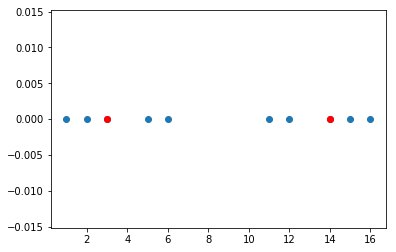

In [49]:
demonstration(points, 3)

Radius: 4
The number of recommended points: 2
Centers: [2, 12]


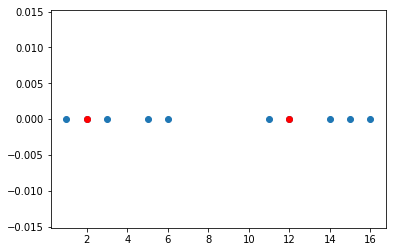

In [50]:
demonstration(points, 4)

Radius: 2
The number of recommended points: 4
Centers: [1, 5, 12, 15]


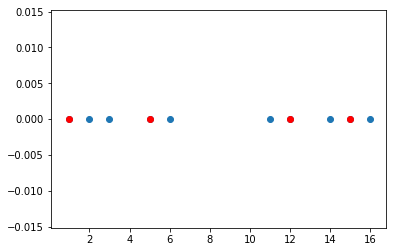

In [51]:
demonstration(points, 2)

Radius: 2
The number of recommended points: 2
Centers: [3, 6]


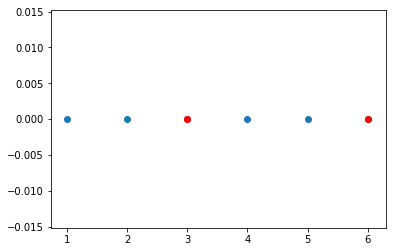

In [54]:
demonstration([6, 2, 4, 3, 5, 1], 2)

In [56]:
points = list(range(0, 11))*15 + list(range(25, 36))*34

Radius: 5
The number of recommended points: 2
Centers: [5, 30]


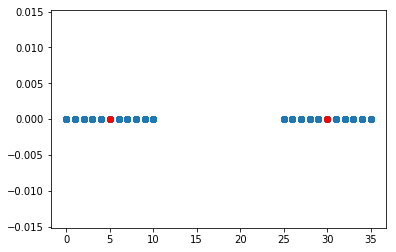

In [57]:
demonstration(points, 5)